In [7]:
import numpy as np
import pandas
import random
import matplotlib.pyplot as plt
%matplotlib inline
%pylab inline
pylab.rcParams['figure.figsize'] = (16.0, 8.0) 

dataBig = pandas.read_csv( 'data\store_train.csv' )
data = dataBig.sample(1000)
 
testd = pandas.read_csv( 'data\store_test.csv' )
 
N = testd.shape[0]
my_preds = np.zeros(( N, 1 ))
 
m = 20
n = len(data)

KMM = np.zeros((m,m))
KMN = np.zeros((m,n))
train_indeces = xrange(len(data))


Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [8]:
print len(data)
print data.iloc[0]

1000
Store                   259
DayOfWeek                 4
Date             2014-04-10
Sales                 10652
Customers              2375
Open                      1
Promo                     0
StateHoliday              0
SchoolHoliday             0
Name: 498993, dtype: object


In [9]:
def basic_kernel(xi, xj):
    return 1 if xi == xj else 0

def kernel(x,y):
    totes = 0    
    totes = totes + basic_kernel( x.Store, y.Store)
    totes = totes + basic_kernel( x.Date, y.Date )
    totes = totes + basic_kernel( x.DayOfWeek, y.DayOfWeek )
    totes = totes + basic_kernel( x.Open, y.Open )
    totes = totes + basic_kernel( x.Promo, y.Promo )
    totes = totes + basic_kernel( x.StateHoliday, y.StateHoliday )
    totes = totes + basic_kernel( x.SchoolHoliday, y.SchoolHoliday )
    
    return totes    

def generateKMM():
    for xi in xrange (m): 
        for xj in range (m):
            in1 = random.choice(train_indeces)
            in2 = random.choice(train_indeces)
            KMM[xi,xj] = kernel(data.iloc[in1], data.iloc[in2])
    return KMM

def generateKMN():
    for xi in xrange(m):
        for xj in range (n):
            KMN[xi,xj] = kernel(data.iloc[xi], data.iloc[xj])
    return KMN
        
def generateKTM(a):
    KTM = np.zeros((1,m))
    for x in range(m):
        KTM[0,x] = kernel(data.iloc[x],a)
    return KTM



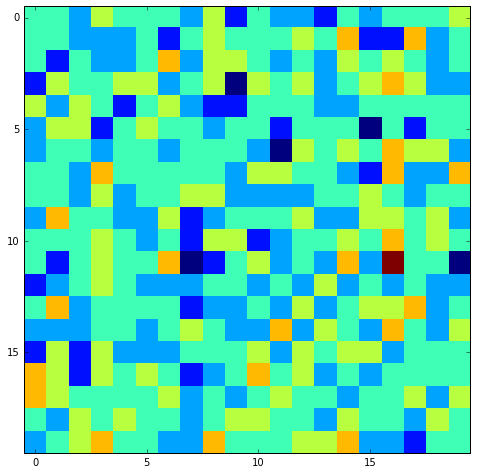

In [10]:

KMM = generateKMM()
KMN = generateKMN()
KNM = np.transpose(KMN)
plt.imshow(KMM.reshape(m,m).T, interpolation='nearest',cmap='jet')



In [11]:
print KMM
print KMN
print KNM

[[ 3.  3.  3.  1.  4.  2.  2.  3.  3.  2.  3.  3.  1.  3.  2.  1.  5.  5.
   3.  2.]
 [ 3.  3.  1.  4.  2.  4.  3.  3.  3.  5.  3.  1.  2.  5.  2.  4.  4.  4.
   2.  3.]
 [ 2.  2.  3.  3.  4.  4.  3.  2.  2.  3.  3.  3.  3.  2.  2.  1.  1.  3.
   4.  4.]
 [ 4.  2.  2.  3.  3.  1.  2.  5.  4.  3.  4.  4.  4.  3.  3.  4.  4.  3.
   3.  5.]
 [ 3.  2.  2.  4.  1.  3.  3.  3.  2.  2.  3.  3.  3.  3.  3.  2.  3.  3.
   4.  3.]
 [ 3.  3.  3.  4.  3.  4.  3.  3.  3.  2.  2.  3.  2.  3.  2.  2.  4.  3.
   3.  3.]
 [ 3.  1.  5.  2.  4.  3.  2.  3.  3.  4.  3.  5.  2.  3.  3.  2.  3.  4.
   3.  2.]
 [ 2.  3.  2.  3.  2.  3.  3.  3.  4.  1.  1.  0.  2.  1.  4.  3.  1.  2.
   2.  2.]
 [ 4.  4.  4.  4.  1.  2.  3.  3.  4.  2.  4.  1.  3.  2.  3.  3.  2.  3.
   3.  5.]
 [ 1.  3.  4.  0.  1.  3.  3.  2.  2.  3.  4.  3.  3.  2.  2.  3.  3.  2.
   4.  3.]
 [ 3.  3.  3.  4.  3.  3.  2.  4.  2.  3.  1.  4.  2.  3.  2.  4.  5.  3.
   4.  3.]
 [ 2.  3.  2.  3.  3.  1.  0.  4.  2.  3.  2.  2.  3.  2.  5.  2.

In [12]:
#sigma can be set to 1       
y = data.Sales
def predictMuPrime(testRow, sigma=1):
    KTM = generateKTM(testRow)
    return KTM.dot(np.linalg.inv(KMN.dot(KNM)+(pow(sigma,2)*KMM))).dot(KMN).dot(y)


N = testd.shape[0]
print N
for id in range(0,N):
    if testd.iloc[id].Open == 1:
        my_preds[id,0]= predictMuPrime(testd.iloc[id])
    else:
        my_preds[id,0] = 0

sfile = open( 'mean_sub.csv', 'wb' )
sfile.write( '"Id","Sales"\n' )
for id in range( 0, N ):
    sfile.write( '%d,%.2f\n' % ( id+1, my_preds[id] ) )  # add one for one-based indexing
sfile.close()

41088


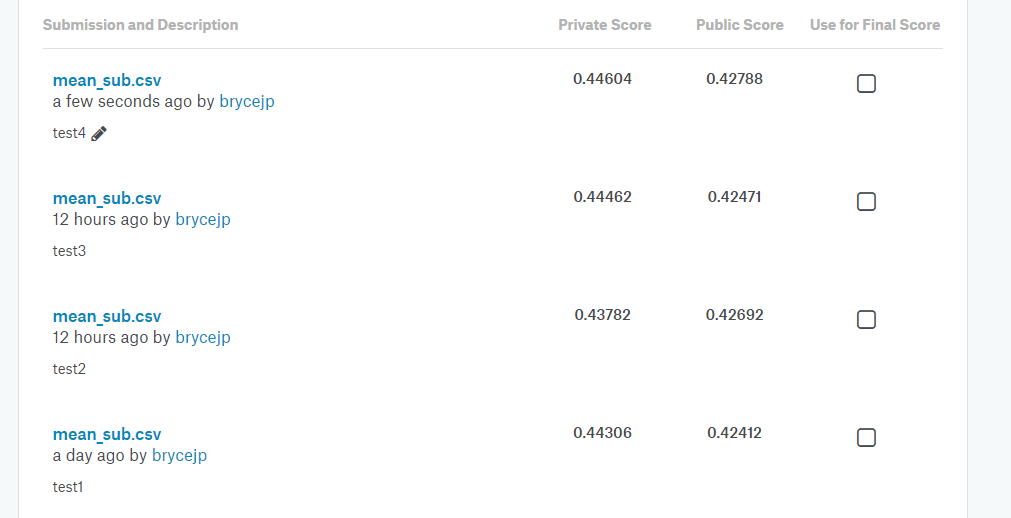

In [13]:
from IPython.display import Image
Image(filename='results.png')